# PART - 1 (LDA)

## Task - 1

In [273]:
##  Complete this code by writing the function definations
##  Compute following terms and print them:
#1. Difference of class wise means = m1 - m2
#2. Total Within-class Scatter Matrix S_W
#3. Between-class Scatter Matrix S_B
#4. The EigenVectors of matrix S_W-1SB corresponding to highest EigenValue
#5. For any input 2-D point, print its projection according to LDA.

import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def ComputeMeanDiff(X):
  ## extracting the X part and y part
  X_train = X[:, :-1]
  y_train = X[:, -1]
  ## storing number of classes
  classes = np.unique(y_train)
  MEAN = []
  ## iterating through class
  for cls in classes:
    X_cls = X_train[y_train == cls]
    mean = np.mean(X_cls, axis = 0)
    MEAN.append(mean)  ## appending in MEAN list

  return (MEAN[0] - MEAN[1])  ## returning the list



def ComputeSW(X):
  ## extracting the X part of features and y label part
  X_train = X[:, :-1]
  y_train = X[:, -1]

  ## storing number of classes for iterationg
  classes = np.unique(y_train)

  ## initializing the scatter_within matrix with 0.
  S_W = np.zeros((X_train.shape[1], X_train.shape[1]))

  ## iterating through classes
  for cls in classes:
      ## extracting rows of class c
      X_c = X_train[y_train == cls]
      ## calculating the mean
      mean_vec = np.mean(X_c, axis=0)
      ## initializing with zeroes
      S_c = np.zeros((X_train.shape[1], X_train.shape[1]))
      ## iterating for each class sample
      for sample in X_c:
          ## calculating the matrix
          deviation = (sample - mean_vec).reshape(-1, 1)
          S_c += deviation.dot(deviation.T)

      S_W += S_c

  return S_W  ## returning the matrix

def ComputeSB(X):
    ## computing the overall mean
    mean = np.mean(X[:,:-1], axis=0)

    ## storing the number of classes
    classes = np.unique(X[:, -1])

    ## initializing the scatter_betwen matrix with zeroes
    S_B = np.zeros((X.shape[1] - 1, X.shape[1] - 1))

    ## iterating through each class
    for cls in classes:

        X_c = X[X[:, -1] == cls][:, :-1]

        mean_vec = np.mean(X_c, axis=0)
        ## calculating the deviation from normal mean
        deviation = mean_vec - mean
        deviation = deviation.reshape(-1, 1)

        S_B += X_c.shape[0] * deviation.dot(deviation.T) ## appending sum in final matrix

    mean_diff = ComputeMeanDiff(X)
    mean_diff = mean_diff.reshape(1,2)
    SB = mean_diff.T.dot(mean_diff)
    return SB  ## returning the matrix

def GetLDAProjectionVector(X):
  ## calculating the S_W-1S_B dot product
  S_W = ComputeSW(X)
  S_B = ComputeSB(X)
  A = np.linalg.inv(S_W).dot(S_B)
  ## calculating the eignevalues and eigenvectors
  eigenvalues, eigenvectors = np.linalg.eig(A)
  eigenvectors  = eigenvectors.T
  ## sorting the eigenvalues and eigenvectors
  indices = np.argsort(abs(eigenvalues))[::-1]  ## sorting the indices
  eigenvalues = eigenvalues[indices]
  eigenvectors = eigenvectors[indices]
  return eigenvectors[0]  ## returning the projection vector

def project(x,y,w):
  ## converting point to array
  array = np.array([x,y])
  return np.dot(array, w.T)

column_names = ["x1", "x2", "label"]


df = pd.read_csv("data.csv", names=column_names)

X = np.empty((0, 3))
with open('data.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for sample in csvFile:
        X = np.vstack((X, sample))

X = X.astype(float)
print(X)
print("Shape : ", X.shape)
print("\n")

# X Contains m samples each of formate (x,y) and class label 0.0 or 1.0
# opt=int(input("Input your option (1-5): "))

# match opt:
#   case 1:
#     meanDiff=ComputeMeanDiff(X)
#     print(meanDiff)
#   case 2:
#     SW=ComputeSW(X)
#     print(SW)
#   case 3:
#     SB=ComputeSB(X)
#     print(SB)
#   case 4:
#     w=GetLDAProjectionVector(X)
#     print(w)
#   case 5:
#     x=int(input("Input x dimension of a 2-dimensional point :"))
#     y=int(input("Input y dimension of a 2-dimensional point:"))
#     w=GetLDAProjectionVector(X)
#     print(project(x,y,w))

[[ 1.86189843  2.72296272  0.        ]
 [ 2.23589604 -2.15772062  0.        ]
 [ 1.69281688  0.99589606  0.        ]
 ...
 [ 4.46678886  3.44492577  1.        ]
 [ 5.65897988  4.04334073  1.        ]
 [ 1.98017955  7.15815205  1.        ]]
Shape :  (2000, 3)




## Task - 2

In [274]:
diff = ComputeMeanDiff(X)
S_B = ComputeSB(X)
S_W = ComputeSW(X)
vectors = GetLDAProjectionVector(X)
projected_data = np.dot(X[:, :-1], vectors.T)
w = vectors.reshape(1,2)

In [275]:
projected_data = projected_data.reshape(-1,1)

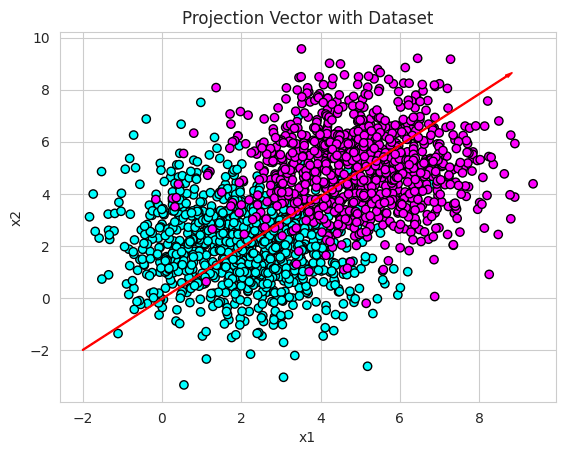

In [276]:
##  plot to show the projection vector along with dataset
plt.scatter(X[:, 0], X[:, 1], c=X[:,-1], cmap='cool', edgecolor='k')
plt.arrow(-2, -2, w[0, 0]*15, w[0, 1]*15, head_width=0.1, head_length=0.2,width=0.03, fc='red', ec='red')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Projection Vector with Dataset')
plt.grid(True)
plt.show()

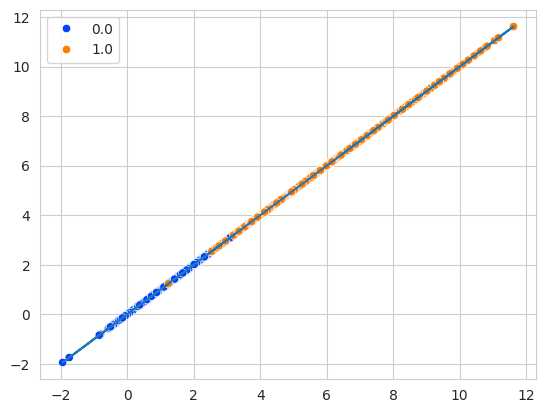

In [277]:
## Scatterplot to show the projected data
sns.scatterplot(x=projected_data[:, 0], y=projected_data[:, 0], hue=X[:, -1], palette="bright")
plt.plot(projected_data[:, 0] , projected_data[:, 0])
plt.grid(True)
plt.show()

## Task - 3

In [278]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [279]:
## Train the KNN model for normal dataset
X1 = X[:, :-1]
y1 = X[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=30)
k = 20
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred1 = knn.predict(X_test)
accuracy_score(y_test, y_pred1)

0.925

In [280]:
## Training the model for projected data
X_train, X_test, y_train, y_test = train_test_split(projected_data, y1, test_size=0.2, random_state=30)
knn1 = KNeighborsClassifier(n_neighbors=k)
knn1.fit(X_train, y_train)
y_pred1 = knn1.predict(X_test)
accuracy_score(y_test, y_pred1)

0.935

In [281]:
## Comparison with LDA Class From Sklearn

In [282]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [283]:
X = df.drop(columns=["label"]).values
y = df["label"]
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X, y)

In [284]:
## Training the model for projected data
X_train, X_test, y_train, y_test = train_test_split(X_lda, y1, test_size=0.2, random_state=30)
knn2 = KNeighborsClassifier(n_neighbors=k)
knn2.fit(X_train, y_train)
y_pred1 = knn2.predict(X_test)
accuracy_score(y_test, y_pred1)

0.935

In [285]:
acc1_lst = []
acc2_lst = []
for i in range(1, 50, 2):
  k = i
  X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=30)
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred1 = knn.predict(X_test)
  acc1_lst.append(accuracy_score(y_test, y_pred1))

  X_train, X_test, y_train, y_test = train_test_split(X_lda, y1, test_size=0.2, random_state=30)
  knn2 = KNeighborsClassifier(n_neighbors=k)
  knn2.fit(X_train, y_train)
  y_pred1 = knn2.predict(X_test)
  acc2_lst.append(accuracy_score(y_test, y_pred1))

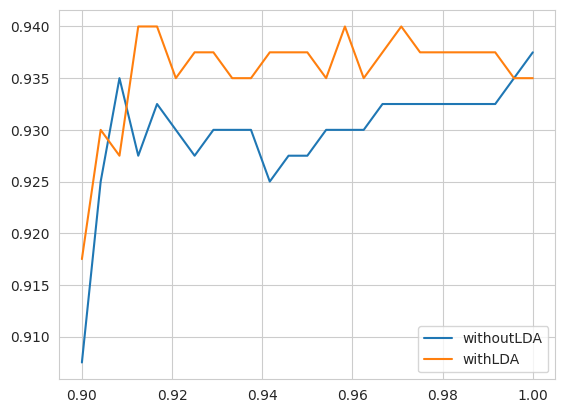

In [286]:
## plot to compare accuracies
array = np.linspace(0.90, 1, 25)
plt.plot(array, acc1_lst, label="withoutLDA")
plt.plot(array, acc2_lst, label="withLDA")
plt.legend()
plt.show()

# PART - 2 (NAIVE BAYES)

In [287]:
## import necessaries libraries
import pandas as pd
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/anandmishra22/PRML-Spring-2023/main/programmingAssignment/PA-4/naive_bayes.csv")

In [288]:
df.head()  ## printing the data

,Outlook,Temp,Humidity,Windy,Play
0,Rainy,Hot,High,f,no
1,Rainy,Hot,High,t,no
2,Overcast,Hot,High,f,yes
3,Sunny,Mild,High,f,yes
4,Sunny,Cool,Normal,f,yes


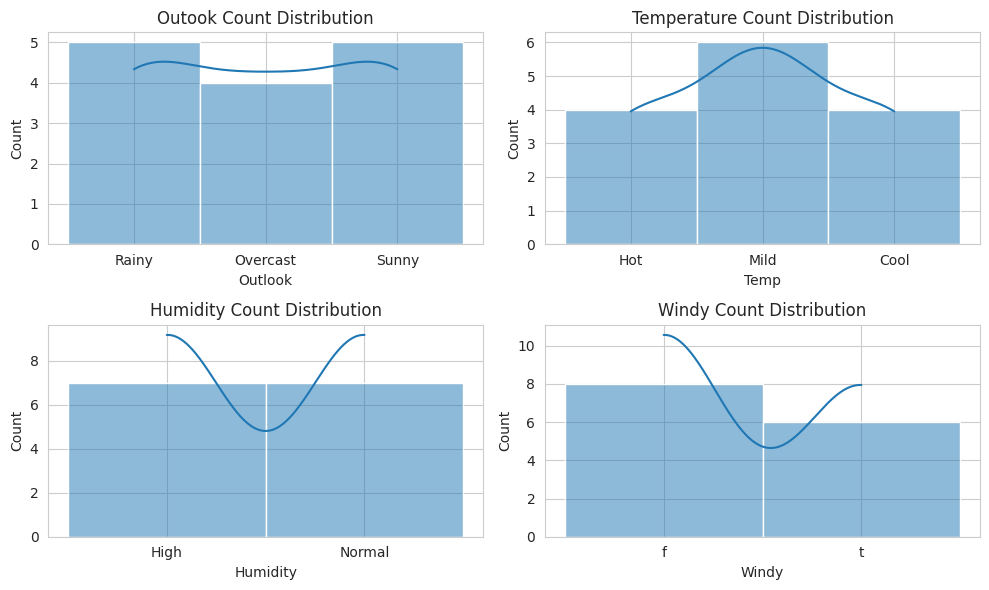

In [289]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Plot 1 - Outlook
sns.histplot(x=df["Outlook"], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Outook Count Distribution')

# Plot 2 - Temperature
sns.histplot(x=df["Temp"], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Temperature Count Distribution')

# Plot 3 - Humidity
sns.histplot(x=df["Humidity"], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Humidity Count Distribution')

# Plot 4 - Windy
sns.histplot(x=df["Windy"], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Windy Count Distribution')
plt.tight_layout()

# Show plot
plt.show()

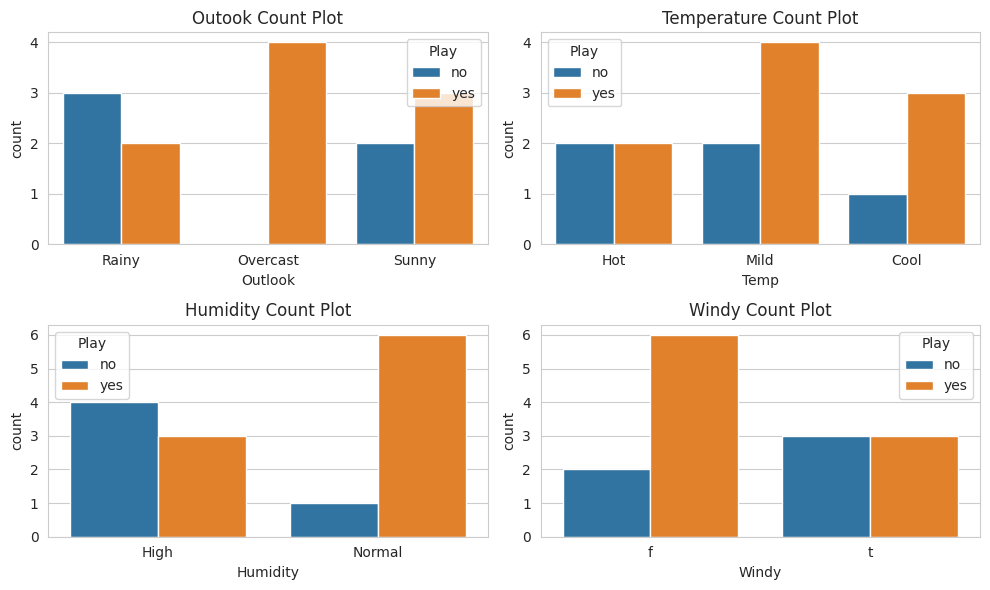

In [290]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Plot 1 - Outlook
sns.countplot(x=df["Outlook"], hue=df["Play"], ax=axes[0, 0])
axes[0, 0].set_title('Outook Count Plot')

# Plot 2 - Temperature
sns.countplot(x=df["Temp"], hue=df["Play"], ax=axes[0, 1])
axes[0, 1].set_title('Temperature Count Plot')

# Plot 3 - Humidity
sns.countplot(x=df["Humidity"], hue=df["Play"], ax=axes[1, 0])
axes[1, 0].set_title('Humidity Count Plot')

# Plot 4 - Windy
sns.countplot(x=df["Windy"], hue=df["Play"], ax=axes[1, 1])
axes[1, 1].set_title('Windy Count Plot')
plt.tight_layout()

# Show plot
plt.show()

## Task - 0

In [291]:
from sklearn.model_selection import train_test_split

In [292]:
## extracting X, y values from dataframe
X = df.drop(columns=["Play"]).values
y = df["Play"].values

In [293]:
## performing train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 2/14, random_state=25)

## Task - 1

In [294]:
## Explaining prior , posterior and likelihood probabilities

In [295]:
## Calculating Prior Probabilities
def calculate_prior(y_train):
  yes = 0
  no = 0
  for i in y_train:
    if i == "yes":
      yes = yes + 1
    else:
      no = no + 1
  prior_yes = yes / (yes + no)  ## calculating P(yes)
  prior_no = no / (yes + no)  ## calculating P(no)
  return prior_yes, prior_no

In [296]:
prior_yes, prior_no = calculate_prior(y_train)  ## calling the prior probability_function

In [297]:
## priting prior probabilities
print("Probability(Play =  yes) : ", prior_yes, "\nProbability(Play = no) : ", prior_no)

Probability(Play =  yes) :  0.6666666666666666 
Probability(Play = no) :  0.3333333333333333


## Task - 2

In [298]:
## Calculating Likelihood Probabilities

## function to calculate the likelihood probability
def cal_prob(key, target):
  array = []
  ## creating the array where "play" == target
  for index in range(y_train.shape[0]):
    if y_train[index] == target:
      array.append(X_train[index])

  count = 0
  ## loop to count the value of key
  for row in array:
    for i in row:
      if i == key :
        count = count + 1
  return count / len(array)   ## returning the probability

## Calculating for Outlook
outlook_prob = None
temp_prob = None
humidity_prob = None
windy_prob = None


outlook_prob = {
    "Sunny" : {"yes" : 0.0 , "no" : 0.0},
    "Overcast" : {"yes" : 0.0, "no" : 0.0},
    "Rainy" : {"yes" : 0.0, "no" : 0.0}
}

for key, values in outlook_prob.items():
  for target, val in values.items():
    outlook_prob[key][target] = cal_prob(key, target)

## Calculating for Temp
temp_prob = {
    "Hot" : {"yes" : 0.0 , "no" : 0.0},
    "Mild" : {"yes" : 0.0, "no" : 0.0},
    "Cool" : {"yes" : 0.0, "no" : 0.0}
}

for key, values in temp_prob.items():
  for target, val in values.items():
    temp_prob[key][target] = cal_prob(key, target)


## Calculating for Humidity
humidity_prob = {
    "High" : {"yes" : 0.0 , "no" : 0.0},
    "Normal" : {"yes" : 0.0, "no" : 0.0},
}

for key, values in humidity_prob.items():
  for target, val in values.items():
    humidity_prob[key][target] = cal_prob(key, target)

## Calculating for Windy
windy_prob = {
    "f" : {"yes" : 0.0 , "no" : 0.0},
    "t" : {"yes" : 0.0, "no" : 0.0},
}

for key, values in windy_prob.items():
  for target, val in values.items():
    windy_prob[key][target] = cal_prob(key, target)

In [299]:
columns = ["Outlook", "Temp" ,"Humidity" , "Windy"]

In [300]:
## Final dictionary of Likelihood Probabilities
prob = {
    "Outlook" : outlook_prob,
    "Temp" : temp_prob,
    "Humidity" : humidity_prob,
    "Windy" : windy_prob
}

## Task - 3

In [301]:
## function to calculate the posterior probabilities
def posterior_probabilities(test_input):
  test = {
      "Outlook" : test_input[0],
      "Temp" : test_input[1],
      "Humidity" : test_input[2],
      "Windy" : test_input[3]
  }
  prob_value_yes = prior_yes
  ## calculating with "yes"
  for index, value in test.items():
    prob_value_yes  = prob_value_yes * prob[index][value]["yes"]

  ## calculating with "no"
  prob_value_no = prior_no
  for index, value in test.items():
    prob_value_no  = prob_value_no * prob[index][value]["no"]

  ## return probability
  return prob_value_yes, prob_value_no

## Task - 4

In [302]:
## functions to calculate the predictions
def predictions(X_test):
  pred = []
  for row in X_test:
    yes, no = posterior_probabilities(row)
    # print(yes, no)
    if(yes > no):
      pred.append("yes")
    else:
      pred.append("no")
  return pred


In [303]:
y_pred = predictions(X_test)  ## storing the predicted_array

In [304]:
y_pred  ## printing the predictions

['yes', 'yes']

In [305]:
from sklearn.metrics import accuracy_score

In [306]:
accuracy_score(y_test, y_pred)  ## printing accuracy_score

0.5

In [307]:
prob  ## likelihood probability array

{'Outlook': {'Sunny': {'yes': 0.25, 'no': 0.5},
  'Overcast': {'yes': 0.5, 'no': 0.0},
  'Rainy': {'yes': 0.25, 'no': 0.5}},
 'Temp': {'Hot': {'yes': 0.25, 'no': 0.25},
  'Mild': {'yes': 0.375, 'no': 0.5},
  'Cool': {'yes': 0.375, 'no': 0.25}},
 'Humidity': {'High': {'yes': 0.375, 'no': 0.75},
  'Normal': {'yes': 0.625, 'no': 0.25}},
 'Windy': {'f': {'yes': 0.625, 'no': 0.25}, 't': {'yes': 0.375, 'no': 0.75}}}

## Task - 5

In [308]:
## defining the class to train data using normal NaiveBayes
class NaiveBayes:

## defining the constructor ##
  def __init__(self):
    self.prob = None
    self.prior_yes = 0
    self.prior_no = 0

## posterior_probabilities ##
  def posterior_probabilities(self, test_input, prob):
    test = {
        "Outlook" : test_input[0],
        "Temp" : test_input[1],
        "Humidity" : test_input[2],
        "Windy" : test_input[3]
    }

    ## calculating probability of yes
    prob_value_yes = prior_yes
    for index, value in test.items():
      prob_value_yes  = prob_value_yes * prob[index][value]["yes"]

    ## calculating probability of no
    prob_value_no = prior_no
    for index, value in test.items():
      prob_value_no  = prob_value_no * prob[index][value]["no"]


    return prob_value_yes, prob_value_no

## cal_prob ##
  def cal_prob(self, key, target, feature):
     feature_dict = {
     "Outlook" : 3,
     "Temp" : 3,
     "Humidity" : 2,
     "Windy" : 2
     }

     array = []
     for index in range(y_train.shape[0]):
       if y_train[index] == target:
         array.append(X_train[index])

     count = 0
     for row in array:
       for i in row:
         if i == key :
           count = count + 1
     return count / len(array)

  def fit(self, X_train, y_train):
    ## Calculating Likelihood Probabilities

    ## Calculating for Outlook
    yes = 0
    no = 0
    for i in y_train:
      if i == "yes":
        yes = yes + 1
      else:
        no = no + 1
    prior_yes = yes / (yes + no)
    prior_no = no / (yes + no)

    outlook_prob = {
        "Sunny" : {"yes" : 0.0 , "no" : 0.0},
        "Overcast" : {"yes" : 0.0, "no" : 0.0},
        "Rainy" : {"yes" : 0.0, "no" : 0.0}
    }

    for key, values in outlook_prob.items():
      for target, val in values.items():
        outlook_prob[key][target] = self.cal_prob(key, target, "Outlook")

    ## Calculating for Temp
    temp_prob = {
        "Hot" : {"yes" : 0.0 , "no" : 0.0},
        "Mild" : {"yes" : 0.0, "no" : 0.0},
        "Cool" : {"yes" : 0.0, "no" : 0.0}
    }

    for key, values in temp_prob.items():
      for target, val in values.items():
        temp_prob[key][target] = self.cal_prob(key, target, "Temp")


    ## Calculating for Humidity
    humidity_prob = {
        "High" : {"yes" : 0.0 , "no" : 0.0},
        "Normal" : {"yes" : 0.0, "no" : 0.0},
    }

    for key, values in humidity_prob.items():
      for target, val in values.items():
        humidity_prob[key][target] = self.cal_prob(key, target, "Humidity")

    ## Calculating for Windy
    windy_prob = {
        "f" : {"yes" : 0.0 , "no" : 0.0},
        "t" : {"yes" : 0.0, "no" : 0.0},
    }

    for key, values in windy_prob.items():
      for target, val in values.items():
        windy_prob[key][target] = self.cal_prob(key, target, "Windy")


    prob = {
    "Outlook" : outlook_prob,
    "Temp" : temp_prob,
    "Humidity" : humidity_prob,
    "Windy" : windy_prob
    }

    self.prob = prob

## predict function ##
  def predict(self, X_test):
    pred = []
    for row in X_test:
      yes, no = self.posterior_probabilities(row, self.prob)
      if(yes > no):
        pred.append("yes")
      else:
        pred.append("no")
    return pred

In [309]:
## NaiveBayes
nb = NaiveBayes()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_train)
accuracy_score(y_train, y_pred)

0.75

In [310]:
class NaiveBayesLaplace:

## defining the constructor
  def __init__(self):
    self.prob_laplace = None
    self.prior_yes = 0
    self.prior_no = 0

## posterior_probabilities_laplace function ##
  def posterior_probabilities_laplace(self, test_input, prob_laplace):
    test = {
        "Outlook" : test_input[0],
        "Temp" : test_input[1],
        "Humidity" : test_input[2],
        "Windy" : test_input[3]
    }
    ## calculating the probability of yes
    prob_value_yes = prior_yes
    for index, value in test.items():
      prob_value_yes  = prob_value_yes * prob_laplace[index][value]["yes"]

    ## calculating the probability of no
    prob_value_no = prior_no
    for index, value in test.items():
      prob_value_no  = prob_value_no * prob_laplace[index][value]["no"]


    return prob_value_yes, prob_value_no

## cal_prob_laplace function ##
  def cal_prob_laplace(self, key, target, feature):
     feature_dict = {
     "Outlook" : 3,
     "Temp" : 3,
     "Humidity" : 2,
     "Windy" : 2
     }

     ## dictionary to store the number of unique features
     a = 1
     array = []
     for index in range(y_train.shape[0]):
       if y_train[index] == target:
         array.append(X_train[index])

     count = 0
     for row in array:
       for i in row:
         if i == key :
           count = count + 1
     return (count + a) / (len(array)    +  a * feature_dict[feature])  ## returning the probability

## fit function ##
  def fit(self, X_train, y_train):
    ## Calculating Likelihood Probabilities

    ## Calculating for Outlook
    yes = 0
    no = 0
    for i in y_train:
      if i == "yes":
        yes = yes + 1
      else:
        no = no + 1
    prior_yes = yes / (yes + no)
    prior_no = no / (yes + no)

    self.prior_yes = prior_yes  ## prior yes
    self.prior_no = prior_no  ## prior no

    outlook_prob_laplace = {
        "Sunny" : {"yes" : 0.0 , "no" : 0.0},
        "Overcast" : {"yes" : 0.0, "no" : 0.0},
        "Rainy" : {"yes" : 0.0, "no" : 0.0}
    }

    for key, values in outlook_prob_laplace.items():
      for target, val in values.items():
        outlook_prob_laplace[key][target] = self.cal_prob_laplace(key, target, "Outlook")

    ## Calculating for Temp
    temp_prob_laplace = {
        "Hot" : {"yes" : 0.0 , "no" : 0.0},
        "Mild" : {"yes" : 0.0, "no" : 0.0},
        "Cool" : {"yes" : 0.0, "no" : 0.0}
    }

    for key, values in temp_prob_laplace.items():
      for target, val in values.items():
        temp_prob_laplace[key][target] = self.cal_prob_laplace(key, target, "Temp")


    ## Calculating for Humidity
    humidity_prob_laplace = {
        "High" : {"yes" : 0.0 , "no" : 0.0},
        "Normal" : {"yes" : 0.0, "no" : 0.0},
    }

    for key, values in humidity_prob_laplace.items():
      for target, val in values.items():
        humidity_prob_laplace[key][target] = self.cal_prob_laplace(key, target, "Humidity")

    ## Calculating for Windy
    windy_prob_laplace = {
        "f" : {"yes" : 0.0 , "no" : 0.0},
        "t" : {"yes" : 0.0, "no" : 0.0},
    }

    for key, values in windy_prob_laplace.items():
      for target, val in values.items():
        windy_prob_laplace[key][target] = self.cal_prob_laplace(key, target, "Windy")


    prob_laplace = {
    "Outlook" : outlook_prob_laplace,
    "Temp" : temp_prob_laplace,
    "Humidity" : humidity_prob_laplace,
    "Windy" : windy_prob_laplace
    }

    self.prob_laplace = prob_laplace  ## returning the dictionary of likelihood

## predict funtion ##
  def predict(self, X_test):
    ## predict function to make the predictions on the input test
    pred = []
    for row in X_test:
      yes, no = self.posterior_probabilities_laplace(row, self.prob_laplace)  ## finding the posterior probability
      if(yes > no):
        pred.append("yes")
      else:
        pred.append("no")
    return pred  ## returing the predicted array

In [311]:
nbl = NaiveBayesLaplace()
nbl.fit(X_train, y_train)
y_pred = nbl.predict(X_train)
accuracy_score(y_train, y_pred)  ## printing the accuracy

0.8333333333333334

In [312]:
random  = []
acc1_lst = []
acc2_lst = []
## training the model for different random_state
for i in range(100):
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 2/14, random_state=i)
  random.append(i)
  ## training the normal NaiveBayes
  nb = NaiveBayes()
  nb.fit(X_train, y_train)
  y_pred1 = nb.predict(X_train)
  acc1 = accuracy_score(y_train, y_pred1)
  acc1_lst.append(acc1)  ## appending in list

  ## training the NaiveBayes with Laplace Smoothing
  nb1 = NaiveBayesLaplace()
  nb1.fit(X_train, y_train)
  y_pred1 = nb1.predict(X_train)
  acc2 = accuracy_score(y_train, y_pred1)
  acc2_lst.append(acc2)  ## appending in list

In [313]:
## creating  a dictionary for the accuracies comparison
accuracy_dict = {
    "NB" : acc1_lst,
    "NBwithLS" : acc2_lst
}

acc_df = pd.DataFrame(accuracy_dict, columns=["NB" , "NBwithLS"])

In [314]:
acc_df.head()  ## printing the comparison

,NB,NBwithLS
0,0.833333,0.750000
1,0.916667,0.916667
2,0.833333,0.916667
3,0.916667,0.916667
4,0.916667,0.916667


In [315]:
## plot for visualizing the accuracies between "NaiveBayes" vs "NaiveBayesLaplace"

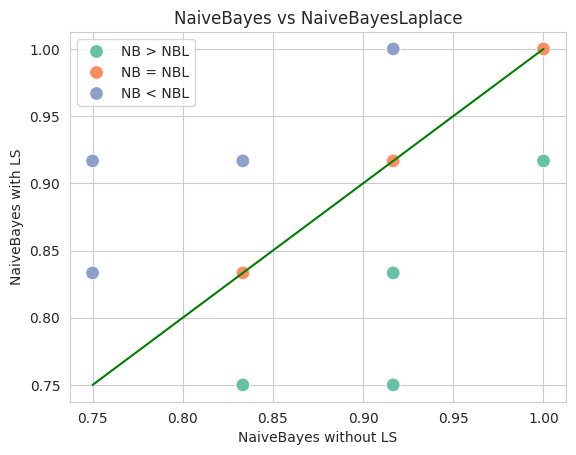

In [316]:
## importing necessaries libraries
import seaborn as sns
import matplotlib.pyplot as plt

categories = []
acc_nb = 0
acc_nbl = 0
acc_nb_nbl_equal = 0

## iterating to append to the list and select category for proper visualization
for i in range(100):
  if acc1_lst[i] > acc2_lst[i]:
    categories.append("NB > NBL")
    acc_nb = acc_nb + 1
  elif acc1_lst[i] < acc2_lst[i]:
    categories.append("NB < NBL")
    acc_nbl = acc_nbl + 1
  else:
    categories.append("NB = NBL")
    acc_nb_nbl_equal = acc_nb_nbl_equal + 1

# Create scatter plot with custom palette and grid
sns.scatterplot(x=acc1_lst, y=acc2_lst, palette='Set2', marker='o', s=100, hue=categories)
sns.set_style("whitegrid")
plt.plot([0.75,1], [0.75, 1], color="green")

# Adding the title
plt.xlabel('NaiveBayes without LS')
plt.ylabel('NaiveBayes with LS')
plt.title('NaiveBayes vs NaiveBayesLaplace')

# Show plot
plt.show()


In [317]:
print("NB > NBL : ", acc_nb)
print("NB < NBL : ", acc_nbl)
print("NB = NBL : ", acc_nb_nbl_equal)

NB > NBL :  16
NB < NBL :  16
NB = NBL :  68
